# <span style="color:darkblue"> Lecture 21 - Word Clouds (Optional)  </span>

<font size = "5">

In  this lecture we will work with text data

- Basic summary and data manipulation
- Generate word clouds!

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Installation

- No support yet for Python 3.11!!
- Works for older versions of Python (including Anaconda)

In [1]:
# If you're using base Python, open the terminal and type
#   pip3 install wordcloud
# If this doesn't work do:
#   pip3 install '/Users/asanc31/Documents/GitHub/qtm151spring2023/Lecture 24/installation/wordcloud-1.8.2.2.tar'
# You will have to change the path to the one in your file in Lecture 24.

# If you're using Anaconda, open the termianl and type
#   conda install -c https://conda.anaconda.org/conda-forge wordcloud
# Note: You will get a prompt for whether you want to continue. Type yes:
#    y 
# Note: this is another way to install packages, especially custom ones that
# are not included in the standard Anaconda libraries.

<font size = "5">

Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<font size = "5">

Import Data

- Congressional bills in the United States

In [3]:
bills_actions = pd.read_csv("data_raw/bills_actions.csv")
bills_actions.dtypes

Congress        int64
bill_number     int64
bill_type      object
action         object
main_action    object
category       object
member_id       int64
dtype: object

# <span style="color:darkblue"> II. Word Clouds from Single Strings  </span>

<font size = "5">

Word Cloud from sentence

(-0.5, 399.5, 199.5, -0.5)

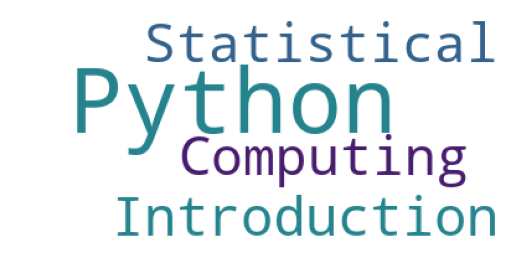

In [4]:
# We start by generating a string with text
# The WordCloud() command generates and object. To display it use "plt.imgshow()"
# Words with higher frequency will tend to appear larger (see advanced options)
# at the end for how to adjust the relative scaling

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Get word frequencies

In [5]:
word_frequencies = WordCloud().process_text(text)
word_frequencies

{'Introduction': 1, 'Statistical': 1, 'Computing': 1, 'Python': 5}

<font size = "5">

Adding stop words

- WordCloud drops common words like "to, from, the, a, ..."
- They're stored in STOPWORDS. We can add more!

(-0.5, 399.5, 199.5, -0.5)

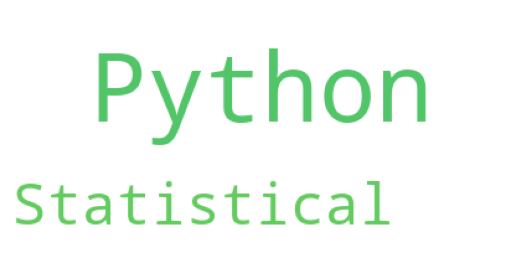

In [6]:
# Create adjusted list of stop words

stop_words = list(STOPWORDS) + ["Introduction","Computing"]
text = "Introduction to Statistical Computing Python Python Python Python Python"

# Plot results
# If you don't wan't any stopwords, use "stopwords = []" instead
word_cloud = WordCloud(background_color = "white",
                       stopwords = stop_words).generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Try it yourself!

- Search in Wikipedia for an article.
- Copy a paragraph into Python and store it as <br>
a string variable called "text".
- Display a word cloud!

In [7]:
# Write your own code


# <span style="color:darkblue"> III. Word Clouds + Pandas </span>

<font size = "5">

Concatanate column into single long sentence

In [8]:
# We start of with an empty string and sequentiall
# concatenate all the elements of bills["main_action"] together

list_categories = ["house bill","senate bill"]
bills = bills_actions.query('category in @list_categories')

text_bills = "".join(bills["action"])

<font size = "5">

Create WordCloud

(-0.5, 399.5, 199.5, -0.5)

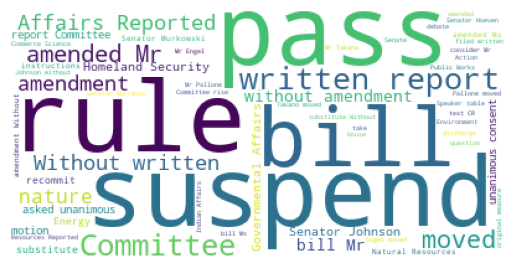

In [9]:
#stopwords = list(STOPWORDS) + ["Introduction","Computing"]
#text = "Introduction to Statistical Computing Python Python Python Python Python"

word_cloud = WordCloud(background_color = "white").generate(text_bills)
                       
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Text by subgroup

In [10]:
# Create sets of words by category
subset_bills_house  = bills_actions.query('category == "house bill"')
subset_bills_senate = bills_actions.query('category == "senate bill"')

# Create strings with all the words mentioned for those observations
text_house  = "".join(subset_bills_house["action"])
text_senate = "".join(subset_bills_senate["action"])

<font size = "5" >
Plotting multiple wordclouds

Text(0.5, 1.0, 'Senate')

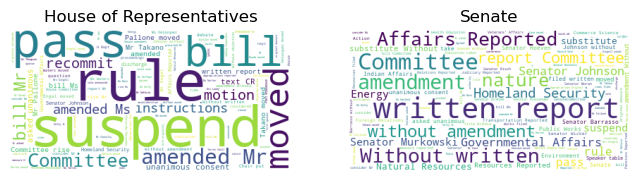

In [11]:
# Use subplots to create figures with multiple plots
fig, list_subfig = plt.subplots(1,2,figsize = [8,3])

word_cloud_house = WordCloud(background_color = "white").generate(text_house)                       
list_subfig[0].imshow(word_cloud_house)
list_subfig[0].axis("off")
list_subfig[0].set_title("House of Representatives")

word_cloud_senate = WordCloud(background_color = "white").generate(text_senate)                       
list_subfig[1].imshow(word_cloud_senate)
list_subfig[1].axis("off")
list_subfig[1].set_title("Senate")

<font size = "5">

**Note:** In general, many possibilities for splitting by subgroups! <br>
Years, geography, type of speaker, type of document, etc.

<font size = "5">
Try it yourself!

- Obtain the text for the categories "house resolution" <br>
and "senate resolution" (separately)
- Plot word clouds for the column "action" for each of the <br>
two categories using ``` plt.subplots()``` and the code <br>
shown above


In [12]:
# Write your own code





# <span style="color:darkblue"> V. (Optional) Advanced Settings </span>

(-0.5, 399.5, 199.5, -0.5)

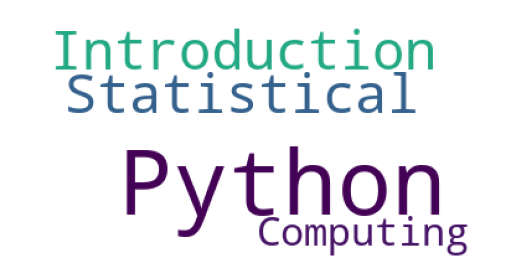

In [13]:
# Relative scaling of high-frequency words

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(width = 400,
                       height = 200,
                       relative_scaling = 0.5, # or "auto"
                       background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")